# Lab 1

## The way i understand this assignement.
- Read the files and transfer them into variables
- Use binary classifcation for machine learning
- Plot the results

## Bonus such as estetics suchs as user input.

Since this exercise is made to evaluate me i will document my thought process and do continuous uploads.

Step 1: Read the files and store them.

    Problems faced:
- HeaderFile (width (cm), height (cm)) making it annoying.
- One format to read lines from the training data and different way to read the test_points
- Generally annoying too figure out where to strip,replace and split.

GitCommit 1 for Lab1

Step 2: Get basic plots up and develop the mean points + Calcultion.

    Problems faced:

- Correct Syntax is a struggle
- Initiations and plot is ugly
- Code becoming spaggetio

GitCommit 2 for Lab1
GitCommit 3 for lab 1(Cleaning and objective achieved.)

Step 3: Add userinput(w) to test_points and clean it and place into functions.

    Problems faced:

- Appending in a way that it can be reintepreted
- Deciding between appending/interpreting techniques
- Confused as to whether BinaryClassification was needed?

Gitcomit 4 för Lab(Passable criteria reached)

Step 4: Clean into more functions, more if statements to keep data reasonable, lay down foundation to reach highest criteria.



Point added!

BinaryClassification:
Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pichu
Sample with (width, height): (22.0, 45.0) classified as Pikachu
Sample with (width, height): (30.0, 25.0) classified as Pichu
Sample with (width, height): (50.0, 60.0) classified as Pikachu
Sample with (width, height): (40.0, 50.0) classified as Pikachu
Sample with (width, height): (30.0, 25.0) classified as Pichu
Sample with (width, height): (30.0, 50.0) classified as Pikachu

Euclidian Distance:
Sample with (width, height): (25.0, 35.0) classified as Pikachu
Sample with (width, height): (15.0, 14.0) classified as Pichu
Sample with (width, height): (26.0, 30.0) classified as Pichu
Sample with (width, height): (22.0, 45.0) classified as Pikachu
Sample with (width, height): (30.0, 25.0) classified as Pichu
Sample with (width, height): (50.0, 60.0) classified as Pikac

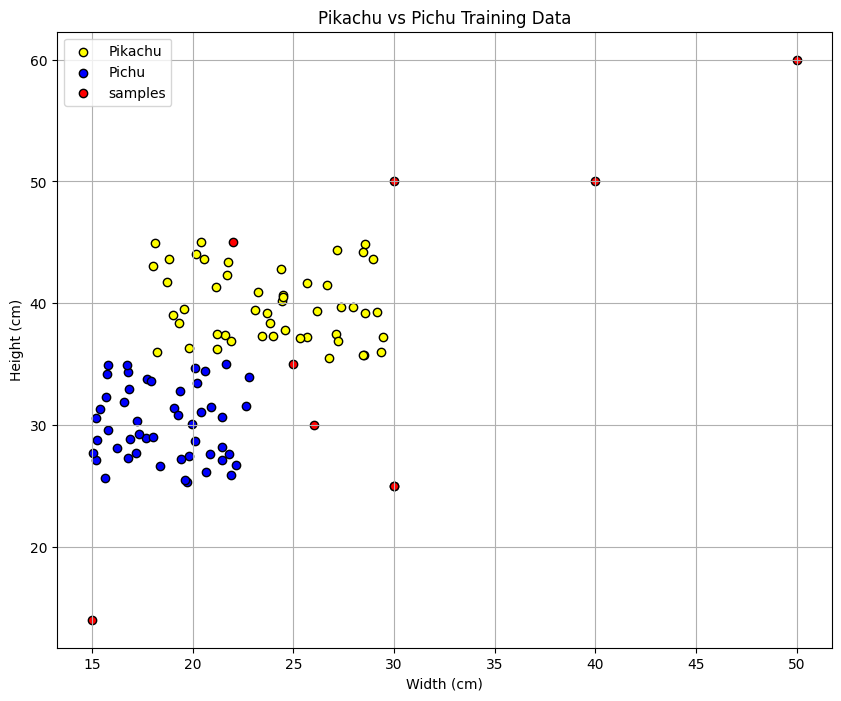

In [50]:
import matplotlib.pyplot as plt
import numpy as np

#Python data initiationlization 
Pikachu_data = []

Pichu_data = []

test_data = []
test_data_link = "Lab1_test_points.txt"


with open("Lab1_pikachu.txt", "r") as file:

    next(file)
    for line in file:
        width, height = line.strip().replace("(", "").replace(")", "").split(",")
        width = float(width)
        height = float(height)
        Pikachu_data.append((width, height))

with open("Lab1_pichu.txt", "r") as file:
    next(file)
    for line in file:
        width, height = line.strip().replace("(", "").replace(")", "").split(",")
        width = float(width)
        height = float(height)
        Pichu_data.append((width, height))

with open(test_data_link, "r") as file: #Modified to read lines if neeeded
    for line in file:
        if line.strip():  
            pairs = line.strip().rstrip(',').split("), (")
            for pair in pairs:
                if pair.strip(): 
                    width, height = pair.replace(
                        "(", "").replace(")", "").split(",")

                    test_data.append((float(width), float(height)))
            

#Numpy Initilization

Pichu_array = np.array(Pichu_data)
Pikachu_array = np.array(Pikachu_data)
mean_width_height_Pichu = np.mean(Pichu_array, axis=0)
mean_width_height_Pikachu = np.mean(Pikachu_array, axis=0)

std_width_height_Pichu = np.std(Pichu_array, axis=0)        # ChatGPT-Syntax
std_width_height_Pikachu = np.std(Pikachu_array, axis=0)    # ChatGPT-Syntax


#Functions
def BinaryClassification(test_point, mean_Pichu, std_Pichu, mean_Pikachu, std_Pikachu):  # ChatGPT-Syntax
    classification = "Pikachu" if all(test_point > mean_Pichu - std_Pichu) and all(      # ChatGPT-Syntax
        test_point < mean_Pikachu + std_Pikachu) else "Pichu"
    return f"Sample with (width, height): {test_point} classified as {classification}"


def EucalyptusDistance(test_point, Pikachu_data, Pichu_data):           # Euclidian 
    
    distances_to_Pikachu = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in Pikachu_data]
    distances_to_Pichu = [np.sqrt((test_point[0] - p[0])**2 + (test_point[1] - p[1])**2) for p in Pichu_data]

    avg_dist_to_Pikachu = np.mean(distances_to_Pikachu)
    avg_dist_to_Pichu = np.mean(distances_to_Pichu)

    classification = "Pikachu" if avg_dist_to_Pikachu < avg_dist_to_Pichu else "Pichu"      # ChatGPT-Syntax
    return f"Sample with (width, height): {test_point} classified as {classification}"



def New_Test_point(File):
        try:
            width = float(input("Insert width(cm)"))
            height = float(input("Insert height(cm)"))     
            
            with open(File, "a") as file:
                file.write(", " + f"({width}, {height})")
        
            print("Point added!")
        except ValueError:
            print("Value needs to a float such as 2 and 4")


New_Test_point(test_data_link)

plt.figure(figsize=(10, 8))
plt.scatter(*zip(*Pikachu_data), color="yellow", label="Pikachu", edgecolor="black")
plt.scatter(*zip(*Pichu_data), color="blue", label="Pichu", edgecolor="black")
plt.scatter(*zip(*test_data), color="red", label="samples", edgecolor="black")


Test_data_output_Binary = [BinaryClassification(point, mean_width_height_Pichu, std_width_height_Pichu, mean_width_height_Pikachu, std_width_height_Pikachu) for point in test_data]
Test_data_output_Binary = [EucalyptusDistance(point, Pikachu_data, Pichu_data) for point in test_data]

print("\nBinaryClassification:")
for message in Test_data_output_Binary:
    print(message)

print("\nEuclidian Distance:")
for message in Test_data_output_Binary:
    print(message)


plt.title("Pikachu vs Pichu Training Data")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()